<a href="https://colab.research.google.com/github/heysourin/Neural-Network-From-Scratch/blob/main/Neural_net_from_scratch_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building Neural Network from Scratch: Using MNIST Dataset**
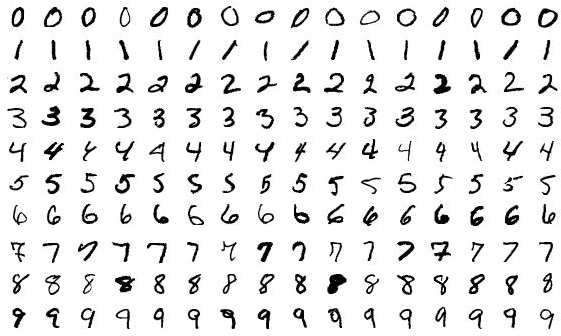

---


## **Importing necessary libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Importing MNSINT Dataset:**

In [2]:
import tensorflow as tf #to import mnist data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **Chcking shapes of our taining and test data:**

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## **How X_train look like?:**

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

---

## **How y_train look like?**

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## **Visualizing some data of X_train:**
  - You can verify them with the outputs of the above cell.

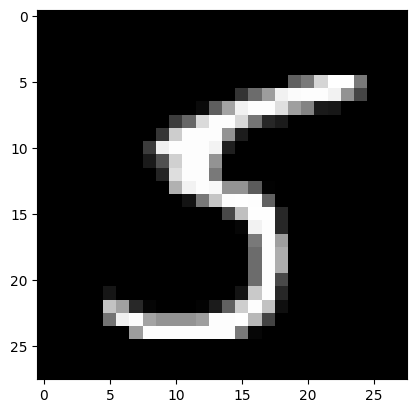

In [6]:
# plt.imshow(X_train[0], cmap='gray')
# plt.imshow(X_train[1], cmap='gray')
plt.imshow(X_train[-3], cmap='gray')

plt.show()

---
## **Normalizing:**

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

---
## **Flattening the 2D into 1D: 728**

In [9]:
X_train_flattened = X_train.reshape(len(X_train), -1)
X_test_flattened = X_test.reshape(len(X_test), -1)

In [10]:
X_train_flattened.shape

(60000, 784)

---
## **Dense Layer:**

In [11]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

---
## **Activation function: ReLU**

In [12]:
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

---
## **Activation function: Softmax**

In [13]:
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities
    return self.output

---
## **Loss function: Sparse Categorical Crossentropy**

In [14]:
class Loss_SparseCategoricalCrossentropy():

  def forward(self, y_pred, y_true):
    y_true_indices = np.array(y_true) # true labels

    # converting true labels to one-hot encoding
    num_classes = y_pred.shape[1] # num_classes = 10 in this case. (Softmax layer output, shape = (60000,10))
    y_true_one_hot = np.eye(num_classes)[y_true_indices]

    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    loss_per_sample = -np.sum(y_true_one_hot * np.log(y_pred_clipped), axis=1)

    return loss_per_sample

  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses) #batch loss
    return data_loss

---
## **Adam Optimizer:**

In [15]:
class Optimizer_Adam:
  def __init__(self, learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7):
    self.learning_rate = learning_rate
    self.beta_1 = beta_1
    self.beta_2 = beta_2
    self.epsilon = epsilon
    self.iterations = 0

  def update_params(self, layer):
    if not hasattr(layer, 'weight_cache'):
      layer.weight_momentums = np.zeros_like(layer.weights)
      layer.weight_cache = np.zeros_like(layer.weights)
      layer.bias_momentums = np.zeros_like(layer.biases)
      layer.bias_cache = np.zeros_like(layer.biases)

    self.iterations += 1

    # Update momentum with current gradients
    layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
    layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

    # Corrected momentum
    weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** self.iterations)
    bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** self.iterations)

    # Update cache with squared current gradients
    layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights ** 2
    layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases ** 2

    # Corrected cache
    weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** self.iterations)
    bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** self.iterations)

    # Update weights and biases
    layer.weights += -self.learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
    layer.biases += -self.learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

---
## **Creating instances of layers:**

In [16]:
layer1 = Layer_Dense(784, 128)
activation1 = Activation_ReLU()
layer2 = Layer_Dense(128, 32)
activation2 = Activation_ReLU()
layer3 = Layer_Dense(32, 10)
activation3 = Activation_Softmax()

---
## **Creating instance of the loss function:**

In [17]:
loss_function = Loss_SparseCategoricalCrossentropy()
optimizer = Optimizer_Adam(learning_rate=0.001)

---
## **Training the model:**

In [18]:
epochs = 101
Losses = []

for epoch in range(epochs):
  # Forward pass
  layer1.forward(X_train_flattened)
  activation1.forward(layer1.output)
  layer2.forward(activation1.output)
  activation2.forward(layer2.output)
  layer3.forward(activation2.output)
  activation3.forward(layer3.output)

  # Calculating loss
  loss = loss_function.calculate(activation3.output, y_train)
  #?? loss = Loss_SparseCategoricalCrossentropy(activation3.output, y_train)
  Losses.append(loss)

  # Backward pass
  dinputs = activation3.output
  dinputs[range(len(dinputs)), y_train] -= 1
  dinputs = dinputs / len(dinputs)

  layer3.dweights = np.dot(activation2.output.T, dinputs)
  layer3.dbiases = np.sum(dinputs, axis=0, keepdims=True)
  dvalues2 = np.dot(dinputs, layer3.weights.T) * (activation2.output > 0)
  layer2.dweights = np.dot(activation1.output.T, dvalues2)
  layer2.dbiases = np.sum(dvalues2, axis=0, keepdims=True)
  dvalues1 = np.dot(dvalues2, layer2.weights.T) * (activation1.output > 0)
  layer1.dweights = np.dot(X_train_flattened.T, dvalues1)
  layer1.dbiases = np.sum(dvalues1, axis=0, keepdims=True)

  # Update weights and biases
  optimizer.update_params(layer1)
  optimizer.update_params(layer2)
  optimizer.update_params(layer3)

  if epoch % 10 == 0:
    print(f'Epoch {epoch+1}, Loss: {loss}')

Epoch 1, Loss: 2.3140489228777428
Epoch 11, Loss: 1.7454593790166102
Epoch 21, Loss: 0.9658681690282256
Epoch 31, Loss: 0.5537062307661618
Epoch 41, Loss: 0.4013020055232089
Epoch 51, Loss: 0.32887208662723283
Epoch 61, Loss: 0.28798439929171943
Epoch 71, Loss: 0.2591292535729162
Epoch 81, Loss: 0.23601236290908856
Epoch 91, Loss: 0.21599411479203173
Epoch 101, Loss: 0.19821041467809816


---
## **Comparing Loss vs Epochs**

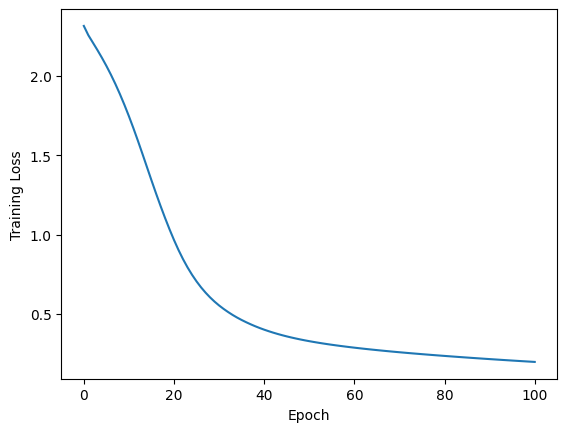

In [19]:
plt.plot(range(epochs), Losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

---
## **Testing accuracy on Test data:**

In [20]:
# Testing the neural network
layer1.forward(X_test_flattened)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
layer3.forward(activation2.output)
activation3.forward(layer3.output)

predictions = np.argmax(activation3.output, axis=1)
accuracy = np.mean(predictions == y_test)

print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9404


------